# 5. Model the Solution

### Preprocessing to get the tidy dataframe

In [1]:
# Import the library we need, which is Pandas and Matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Set some parameters to get good visuals - style to ggplot and size to 15,10
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 10)

In [3]:
# Read the csv file of Monthwise Quantity and Price csv file we have.
df = pd.read_csv('MonthWiseMarketArrivals_clean.csv')

In [4]:
# Changing the date column to a Time Interval columnn
df.date = pd.DatetimeIndex(df.date)

In [5]:
# Change the index to the date column
df.index = pd.PeriodIndex(df.date, freq='M')

In [6]:
# Sort the data frame by date
df = df.sort_values(by = "date")

In [7]:
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
1996-01,LASALGAON(MS),January,1996,225063,160,257,226,MS,LASALGAON,1996-01-01
1996-02,LASALGAON(MS),February,1996,196164,133,229,186,MS,LASALGAON,1996-02-01
1996-03,LASALGAON(MS),March,1996,178992,155,274,243,MS,LASALGAON,1996-03-01
1996-04,LASALGAON(MS),April,1996,192592,136,279,254,MS,LASALGAON,1996-04-01
1996-05,LASALGAON(MS),May,1996,237574,154,312,269,MS,LASALGAON,1996-05-01


## Question 3: How is Price and Quantity related for Onion in Bangalore?

In [13]:
dfBang = df[df.city == 'BANGALORE']

In [14]:
dfBang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
2004-01,BANGALORE,January,2004,227832,916,1066,991,KNT,BANGALORE,2004-01-01
2004-02,BANGALORE,February,2004,225133,741,870,793,KNT,BANGALORE,2004-02-01
2004-03,BANGALORE,March,2004,221952,527,586,556,KNT,BANGALORE,2004-03-01
2004-04,BANGALORE,April,2004,185150,419,518,465,KNT,BANGALORE,2004-04-01
2004-05,BANGALORE,May,2004,137390,400,516,455,KNT,BANGALORE,2004-05-01


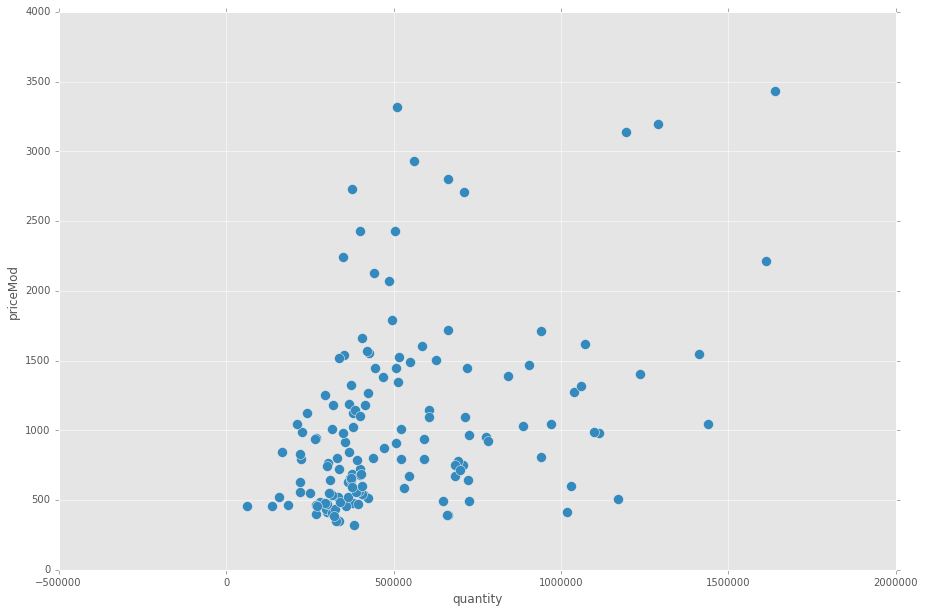

In [15]:
dfBang.plot(kind = "scatter", x = "quantity", y = "priceMod", s = 100)

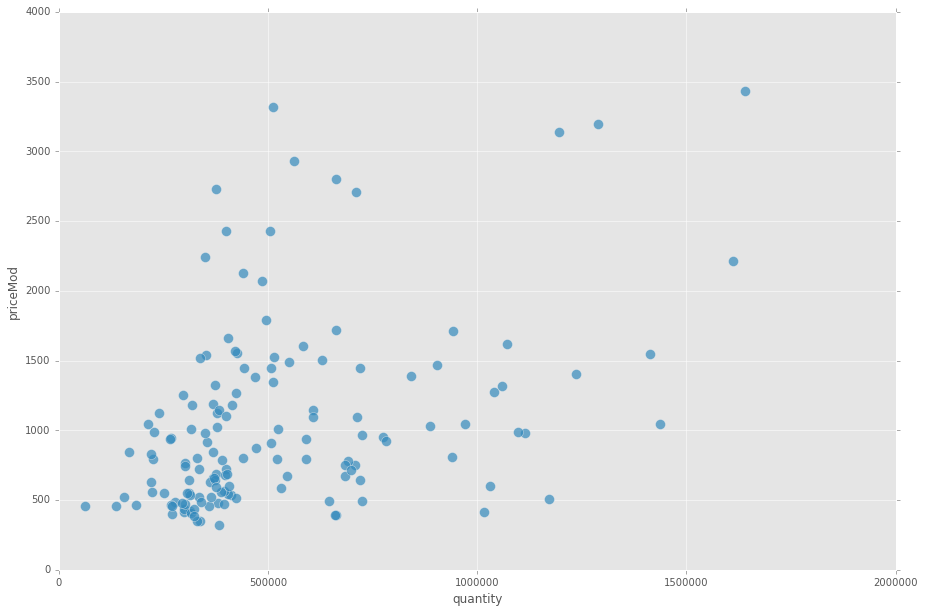

In [16]:
dfBang.plot(kind = "scatter", x = "quantity", y = "priceMod", s = 100, alpha = 0.7, xlim = [0,2000000])

### PRINCIPLE: Correlation

Correlation refers to any of a broad class of statistical relationships involving dependence, though in common usage it most often refers to the extent to which two variables have a linear relationship with each other.

![](../img/corr.svg)

In [17]:
dfBang.corr()

,year,quantity,priceMin,priceMax,priceMod
year,1.000000,0.305041,0.220870,0.631430,0.613692
quantity,0.305041,1.000000,0.122583,0.473275,0.414971
priceMin,0.220870,0.122583,1.000000,0.687350,0.776268
priceMax,0.631430,0.473275,0.687350,1.000000,0.975743
priceMod,0.613692,0.414971,0.776268,0.975743,1.000000


In [18]:
pd.set_option('precision', 2)

In [19]:
dfBang.corr()

,year,quantity,priceMin,priceMax,priceMod
year,1.00,0.31,0.22,0.63,0.61
quantity,0.31,1.00,0.12,0.47,0.41
priceMin,0.22,0.12,1.00,0.69,0.78
priceMax,0.63,0.47,0.69,1.00,0.98
priceMod,0.61,0.41,0.78,0.98,1.00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112ef4fd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x114d8cb90>]], dtype=object)

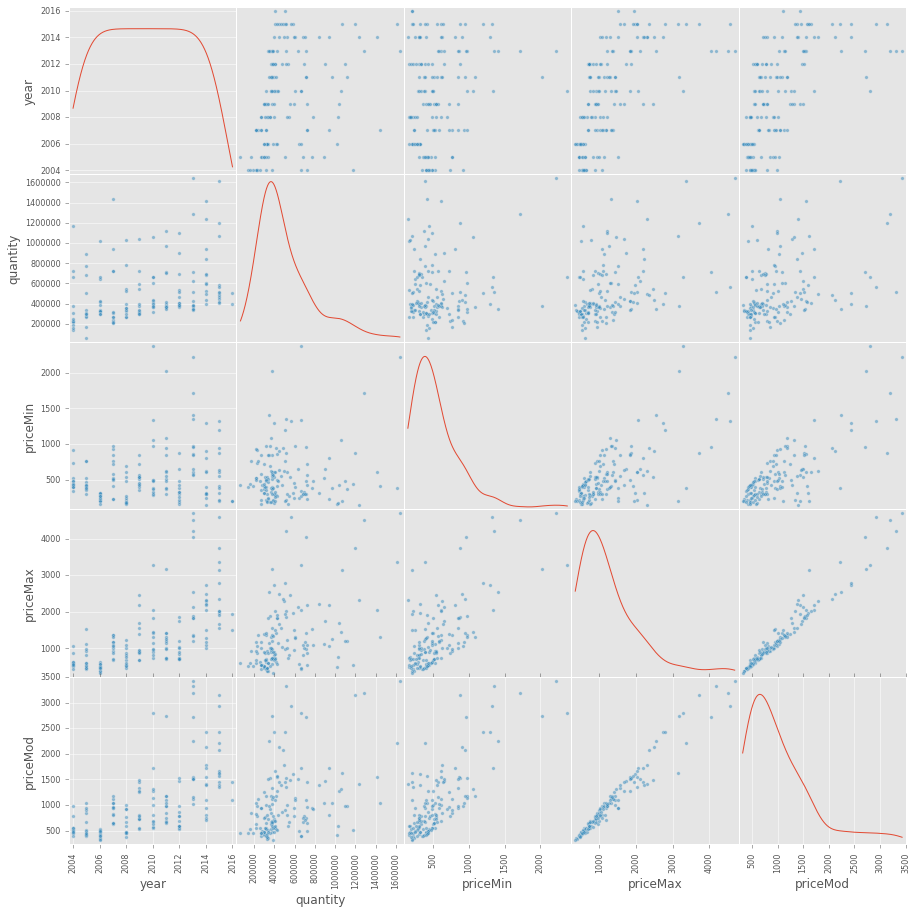

In [20]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(dfBang, figsize=(15, 15), diagonal='kde', s = 50)

### PRINCIPLE: Visualizing linear relationships

In [21]:
# Import seaborn library for more funcitionality
import seaborn as sns

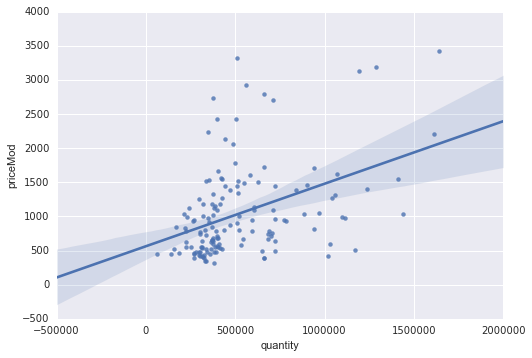

In [22]:
# We can try and fit a linear line to the data to see if there is a relaltionship
sns.regplot(x="quantity", y="priceMod", data=dfBang);

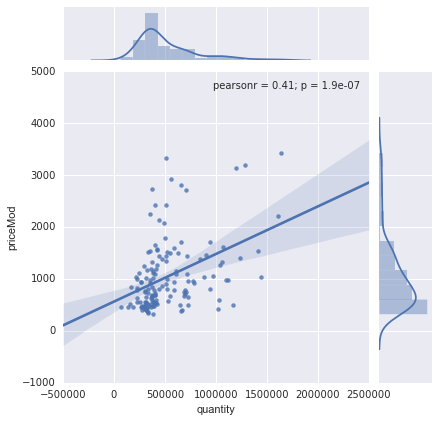

In [23]:
sns.jointplot(x="quantity", y="priceMod", data=dfBang, kind="reg");

### PRINCIPLE: Linear Regression

In [24]:
import statsmodels.api as sm

In [25]:
x = dfBang.quantity
y = dfBang.priceMod
lm = sm.OLS(y, x).fit()

In [26]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               priceMod   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     353.7
Date:                Fri, 18 Mar 2016   Prob (F-statistic):           9.95e-41
Time:                        07:06:14   Log-Likelihood:                -1156.6
No. Observations:                 146   AIC:                             2315.
Df Residuals:                     145   BIC:                             2318.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
quantity       0.0017   9.17e-05     18.808      0.000         0.002     0.002
==============================================================================
Omnibus:                       15.849   Durbin-Watson:                   0.584
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.604
Skew:                           0.622   Prob(JB):                     2.04e-05
Kurtosis:                       4.415   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Question 4: Can we forecast the price of Onion in Bangalore?

### TIme Series Modelling

However, we have our data at constant time intervals of every month. Therefore we can analyze this data  to determine the long term trend so as to forecast the future or perform some other form of analysis. 

- Instead of using linear regression model where observations are independent, our observations are really time-dependent and we should use that.
- Second, we need to account for both a trend component and seasonality component in the time series data to better improve our forecast

In [27]:
# Set some parameters to get good visuals - style to ggplot and size to 15,10
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 10)

In [28]:
dfBang.index = pd.DatetimeIndex(dfBang.date)

In [29]:
dfBang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
2004-01-01,BANGALORE,January,2004,227832,916,1066,991,KNT,BANGALORE,2004-01-01
2004-02-01,BANGALORE,February,2004,225133,741,870,793,KNT,BANGALORE,2004-02-01
2004-03-01,BANGALORE,March,2004,221952,527,586,556,KNT,BANGALORE,2004-03-01
2004-04-01,BANGALORE,April,2004,185150,419,518,465,KNT,BANGALORE,2004-04-01
2004-05-01,BANGALORE,May,2004,137390,400,516,455,KNT,BANGALORE,2004-05-01


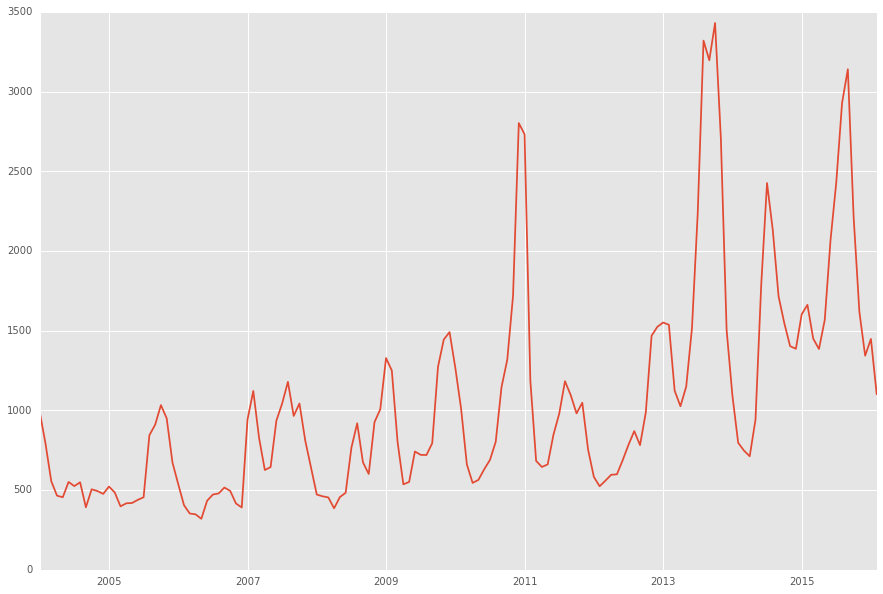

In [104]:
dfBang.priceMod.plot()

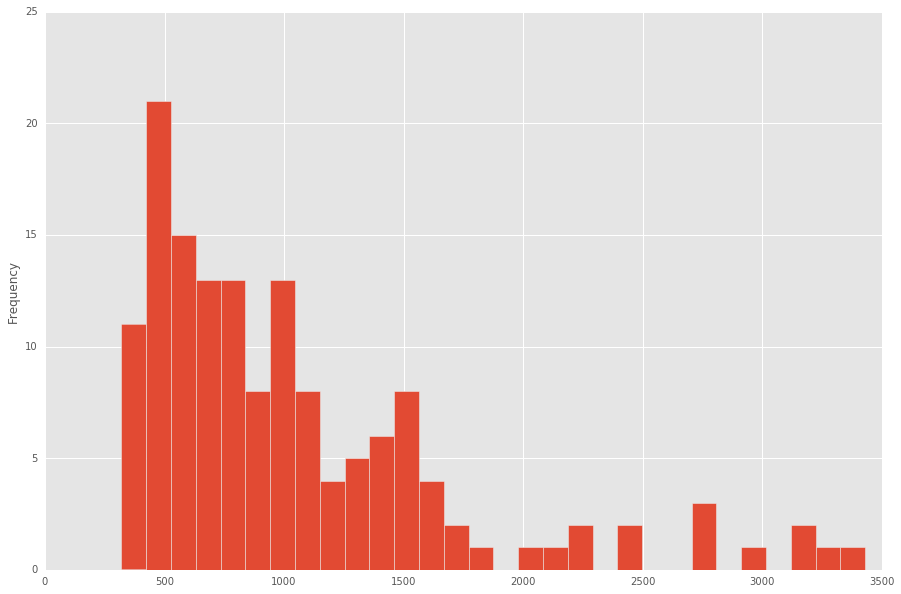

In [105]:
dfBang.priceMod.plot(kind = "hist", bins = 30)

In [108]:
# We take the log transform to reduce the impact of high values
dfBang.loc[:,'priceModLog'] = np.log(dfBang.priceMod)

In [109]:
dfBang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date,time,timeindex,priceModLog
2004-01-01,BANGALORE,January,2004,227832,916,1066,991,KNT,BANGALORE,2004-01-01,0 days,0,6.90
2004-02-01,BANGALORE,February,2004,225133,741,870,793,KNT,BANGALORE,2004-02-01,31 days,1,6.68
2004-03-01,BANGALORE,March,2004,221952,527,586,556,KNT,BANGALORE,2004-03-01,60 days,2,6.32
2004-04-01,BANGALORE,April,2004,185150,419,518,465,KNT,BANGALORE,2004-04-01,91 days,3,6.14
2004-05-01,BANGALORE,May,2004,137390,400,516,455,KNT,BANGALORE,2004-05-01,121 days,4,6.12


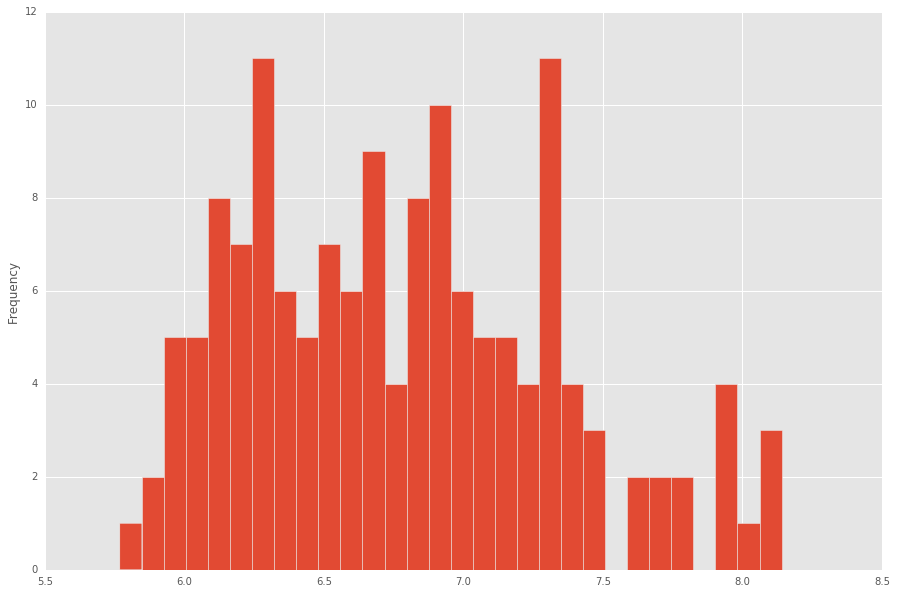

In [110]:
dfBang.priceModLog.plot(kind = "hist", bins = 30)

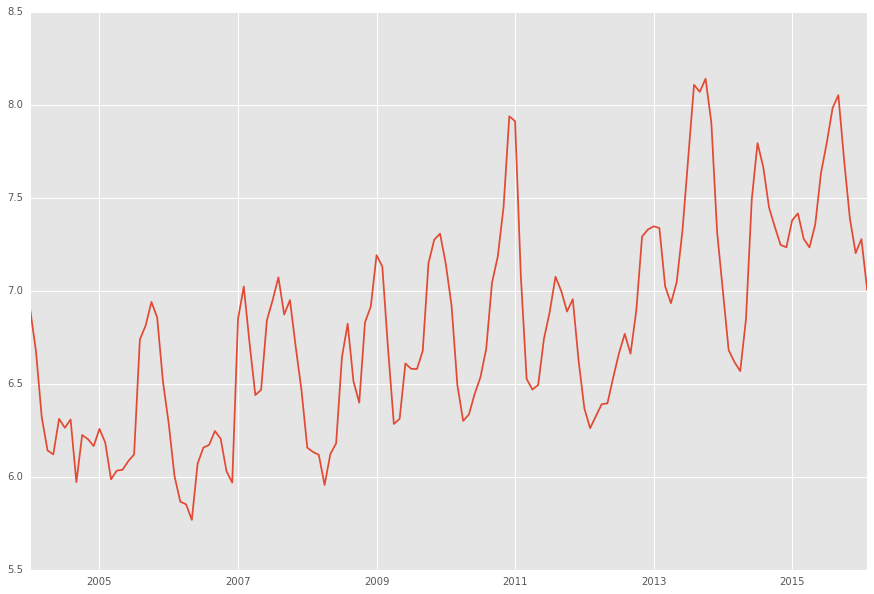

In [111]:
dfBang.priceModLog.plot()

### Lets start with a linear regression model

In [112]:
dfBang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date,time,timeindex,priceModLog
2004-01-01,BANGALORE,January,2004,227832,916,1066,991,KNT,BANGALORE,2004-01-01,0 days,0,6.90
2004-02-01,BANGALORE,February,2004,225133,741,870,793,KNT,BANGALORE,2004-02-01,31 days,1,6.68
2004-03-01,BANGALORE,March,2004,221952,527,586,556,KNT,BANGALORE,2004-03-01,60 days,2,6.32
2004-04-01,BANGALORE,April,2004,185150,419,518,465,KNT,BANGALORE,2004-04-01,91 days,3,6.14
2004-05-01,BANGALORE,May,2004,137390,400,516,455,KNT,BANGALORE,2004-05-01,121 days,4,6.12


In [113]:
# Lets find the minimum date in the time series 
datemin = dfBang.date.min()
datemin

Timestamp('2004-01-01 00:00:00')

In [114]:
# Lets find an index of date by subtracting the minimum time from the date
dfBang.loc[:,'time'] = dfBang.loc[:,'date'] - datemin

In [115]:
# We get a new pandas object called timedelta64
dfBang.dtypes

market                  object
month                   object
year                     int64
quantity                 int64
priceMin                 int64
priceMax                 int64
priceMod                 int64
state                   object
city                    object
date            datetime64[ns]
time           timedelta64[ns]
timeindex                int64
priceModLog            float64
dtype: object

In [116]:
dfBang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date,time,timeindex,priceModLog
2004-01-01,BANGALORE,January,2004,227832,916,1066,991,KNT,BANGALORE,2004-01-01,0 days,0,6.90
2004-02-01,BANGALORE,February,2004,225133,741,870,793,KNT,BANGALORE,2004-02-01,31 days,1,6.68
2004-03-01,BANGALORE,March,2004,221952,527,586,556,KNT,BANGALORE,2004-03-01,60 days,2,6.32
2004-04-01,BANGALORE,April,2004,185150,419,518,465,KNT,BANGALORE,2004-04-01,91 days,3,6.14
2004-05-01,BANGALORE,May,2004,137390,400,516,455,KNT,BANGALORE,2004-05-01,121 days,4,6.12


In [117]:
# Convert to months (these are constant months)
dfBang.loc[:, 'timeindex'] = dfBang.loc[:,'time'] / np.timedelta64(1, 'M')

In [118]:
dfBang.loc[:, 'timeindex'].head()

2004-01-01    0.00
2004-02-01    1.02
2004-03-01    1.97
2004-04-01    2.99
2004-05-01    3.98
Name: timeindex, dtype: float64

In [119]:
dfBang.timeindex.shape

(146,)

In [120]:
dfBang.loc[:, 'timeindex'] = dfBang.loc[:, 'timeindex'].round(0).astype(int)

In [121]:
dfBang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date,time,timeindex,priceModLog
2004-01-01,BANGALORE,January,2004,227832,916,1066,991,KNT,BANGALORE,2004-01-01,0 days,0,6.90
2004-02-01,BANGALORE,February,2004,225133,741,870,793,KNT,BANGALORE,2004-02-01,31 days,1,6.68
2004-03-01,BANGALORE,March,2004,221952,527,586,556,KNT,BANGALORE,2004-03-01,60 days,2,6.32
2004-04-01,BANGALORE,April,2004,185150,419,518,465,KNT,BANGALORE,2004-04-01,91 days,3,6.14
2004-05-01,BANGALORE,May,2004,137390,400,516,455,KNT,BANGALORE,2004-05-01,121 days,4,6.12


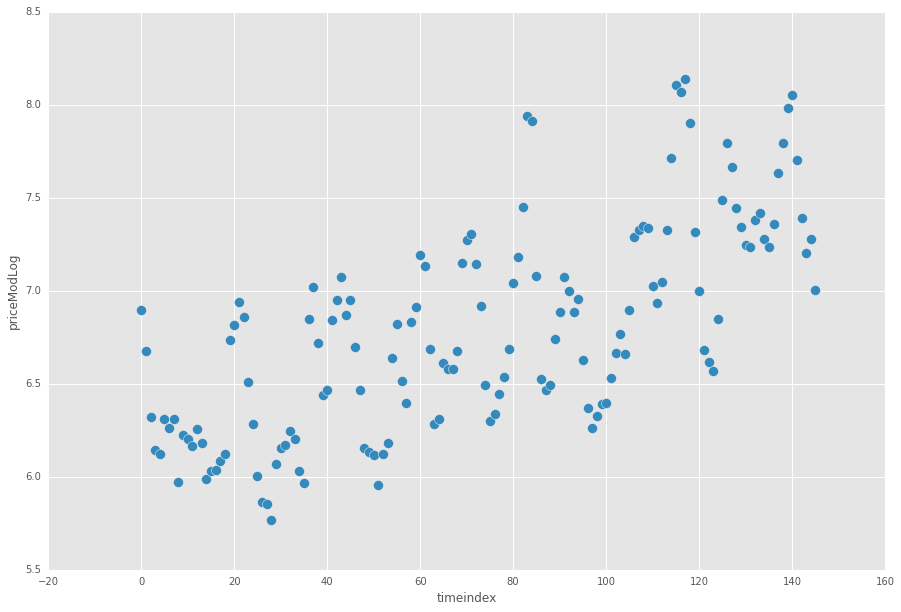

In [124]:
dfBang.plot(kind = "scatter", x = "timeindex", y = "priceModLog", s = 100)

In [125]:
x = dfBang.timeindex
y = dfBang.priceModLog
lm = sm.OLS(y, x).fit()

In [126]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               priceMod   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     555.5
Date:                Fri, 18 Mar 2016   Prob (F-statistic):           1.89e-51
Time:                        07:54:23   Log-Likelihood:                -372.22
No. Observations:                 146   AIC:                             746.4
Df Residuals:                     145   BIC:                             749.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
timeindex      0.0723      0.003     23.570      0.000         0.066     0.078
==============================================================================
Omnibus:                       46.404   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.127
Skew:                           0.041   Prob(JB):                       0.0172
Kurtosis:                       1.847   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
# One approach to remove the trend and seasonality impact is to take the difference between each observation
ts_log_diff = ts_log - ts_log.shift()

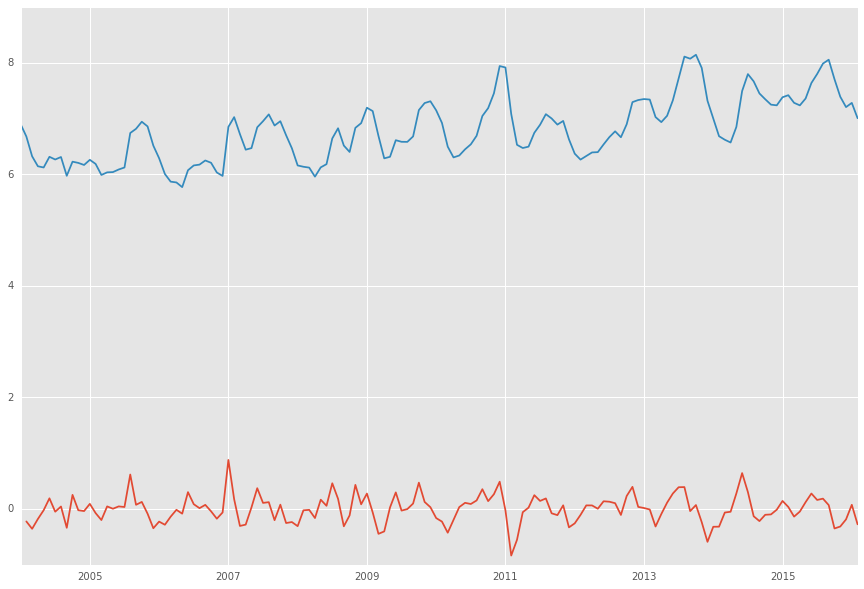

In [33]:
ts_log_diff.plot()
ts_log.plot()

In [34]:
# For smoothing the values we can use
# 12 month Moving Averages 
ts_log_diff_ma = pd.rolling_mean(ts_log_diff, window = 12)

In [35]:
# Simple Exponential Smoothing
ts_log_diff_exp = pd.ewma(ts_log_diff, halflife=24)

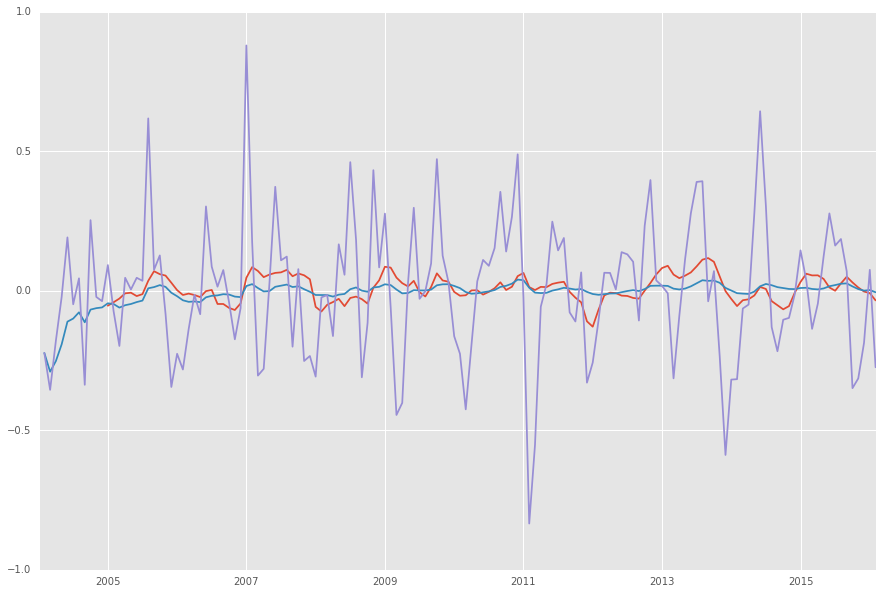

In [36]:
ts_log_diff_ma.plot()
ts_log_diff_exp.plot()
ts_log_diff.plot()

Now we can fit an ARIMA model on this (Explaining ARIMA is out of scope of this workshop)

In [37]:
from statsmodels.tsa.arima_model import ARIMA

In [38]:
model = ARIMA(ts_log, order=(0, 1, 2))

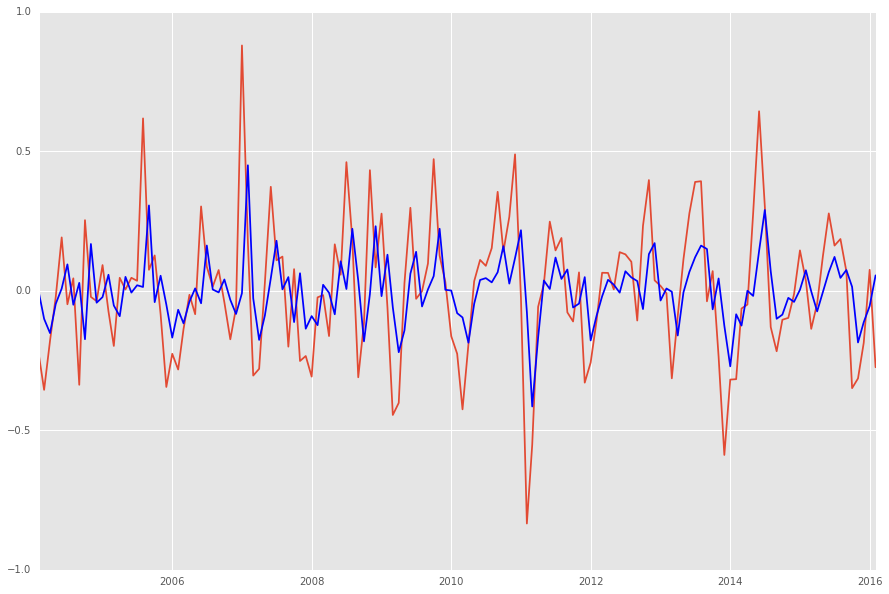

In [39]:
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='blue')